# Análise do dataset do pima indian diabets
    
## Dicionário de dados
    
    
Pregnances - quantidades de gravides;<br>
Glucose - quantidade de glicose em jejum;<br>
BloodPressure - pressão sanguinéa (mm Hg);<br>
SkinThickness - espessura da dobra da pele do triceps (mm);<br>
Insulin - insulina (muU/ ml);<br>
BMI - índice de massa corporal;<br>
DiabetesPedigreeFunction - ;<br>
Age - idade;<br>
Outcome - resultado, 0 é não para diabetes e 1 é sim<br>

## Metodologia
<br>
Usei um algoritmo de árvore de decisão para este desafio. <br>

<p>O dataset deste desafio não tem missing values explícito mas existem muitos valores inconsistentes como valor de 0 em muitos resultados de Insulina, pressão sanguínea e em outros atributos, para estes casos considerei os valores de 0 como missing values, com exceção do atributo de Pregnances por que uma pessoa ter 0 quantidades de gravidez é aceitável.</p><br><br>
De acordo com este [material](https://www.diabetes.org.br/publico/vivendo-com-diabetes/mitos-e-verdades) médico existem pessoas magras com diábetes, ou seja o sobrepeso é um fator de risco mas não é determinante.
<br>
<p>A cada etapa de limpeza ou transformação dos dados visualizei o mapa de correlação.</p><br><br>
A classe predominante é a 0 que representa pessoas saudáveis ela tem 500 objetos enquanto a classe 1 que representa pessoas não saudáveis tem 268. Por este motivo optei por não excluir nenhum objeto <br><br>

<p>Criei um atributo para especificar os nível de BMI, sendo que são:<br><br>
0 = abaixo do peso<br>
1 = peso normal<br>
2 = obeso nível 1<br>
3 = obeso nível 2<br>
4 = obeso nível 3<br>
-10 = valor inconsistente, no dataset esta 0, que é impossível.
<br><br>

A estratégia que utilizei foi, a cada atributo eu separei o dataset em dois conjuntos de dados, um com os pacientes saudáveis (SA) e o outro com os pacientes não saudáveis (NSA), e logo em seguida separei novamente cada subconjunto SA e NSA em dois subconjuntos, um somente com valores inconsistentes pois esses valores deveriam ser substituidos pela média do subconjunto com somente valores consistentes. </br></br>
### Exemplo:

Para o atributo Glucose</br>

1- Separei todo o conjunto de dados em dois subconjuntos, pacientes saudáveis (SA) e não saudáveis (NSA) </br>

2- Separei o subconjunto SA em dois subconjuntos, um com os valores inconsistentes (SA-I) e o outro com os valores validos (SA-V). </br>

3- Tirei a média dos valores de Glucose do subconjunto SA-V </br>

4- Substituí os valores inconsistentes no atributo Glucose do subconjunto SA-I</br>

Isso tudo sem criar outro dataframe</p>


# Resultados

## precisão para classificar um resultado 0 (sem diabetes) de 85%
## precisão para classificar um resultado 1 (com diabetes) de 82%

In [1]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import gc 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# método da árvore de decisão
def tree_decision(df):
    X = df.drop("Outcome",axis=1)
    y = df["Outcome"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    lasso = linear_model.Lasso()
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train,y_train)
    predictions = dtree.predict(X_test)
    
    print("Matrix de confusão")
    print(confusion_matrix(y_test, predictions))
    print('\n')
    print(classification_report(y_test, predictions))
    print('\n')
    
    cv_results = cross_validate(lasso, X, y, cv = 5, n_jobs = -1)
    print("Sorted")
    sorted(cv_results.keys())
    print("\n")
    print("mean test_score = {:3.4f}".format(cv_results["test_score"].mean()))
    print("\n")
    print("mean train_score = {:3.4f}".format(cv_results["train_score"].mean()))
    print("\n")
    print("mean score_time = {:3.4f}".format(cv_results["score_time"].mean()))
    print("\n")
    print("mean fit_time = {:3.4f}".format(cv_results["fit_time"].mean()))

In [4]:
df_file_diabets = pd.read_csv("../datasets/pima-indians-diabetes-database/diabetes.csv", sep=",")

In [5]:
df_file_diabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
tree_decision(df_file_diabets)

Matrix de confusão
[[110  37]
 [ 40  44]]


              precision    recall  f1-score   support

           0       0.73      0.75      0.74       147
           1       0.54      0.52      0.53        84

   micro avg       0.67      0.67      0.67       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.66      0.67      0.67       231



Sorted


mean test_score = 0.1973


mean train_score = 0.2135


mean score_time = 0.0013


mean fit_time = 0.0059


/home/alison/.pyenv/versions/anaconda3-2019.03/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [7]:
df_file_diabets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Vou classificar os níveis de BMI de acordo com a tabela encontrada [aqui](http://ib.bioninja.com.au/standard-level/topic-2-molecular-biology/23-carbohydrates-and-lipids/body-mass-index.html)<br/>
*0 = abaixo do peso* 

*1 = peso normal* 

*2 = obeso nível 1*

*3 = obeso nível 2*

*4 = obeso nível 3*

*-10 se for abaixo de 10 de BMI, por que nem um bebe pode nascer com um BMI abaixo disso*

In [8]:
def classificBMI(BMI):
    if BMI > 10 and BMI < 18.5:
        return 0
    elif BMI > 18.4 and BMI < 25:
        return 1
    elif BMI > 24.9 and BMI < 30:
        return 2
    elif BMI > 29.9 and BMI < 35:
        return 3
    elif BMI > 34.9 and BMI < 40:
        return 4
    elif BMI > 40:
        return 5
    else:
        return -10

In [9]:
df_file_diabets["classificBMI"] = df_file_diabets['BMI'].apply(classificBMI)

In [10]:
df_file_diabets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,classificBMI
0,6,148,72,35,0,33.6,0.627,50,1,3
1,1,85,66,29,0,26.6,0.351,31,0,2
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,2
4,0,137,40,35,168,43.1,2.288,33,1,5
5,5,116,74,0,0,25.6,0.201,30,0,2
6,3,78,50,32,88,31.0,0.248,26,1,3
7,10,115,0,0,0,35.3,0.134,29,0,4
8,2,197,70,45,543,30.5,0.158,53,1,3
9,8,125,96,0,0,0.0,0.232,54,1,-10


In [11]:
# Quantidade total de valores com BMI muito baixo
df_file_diabets.query("classificBMI == -10").any(axis=1).count()

13

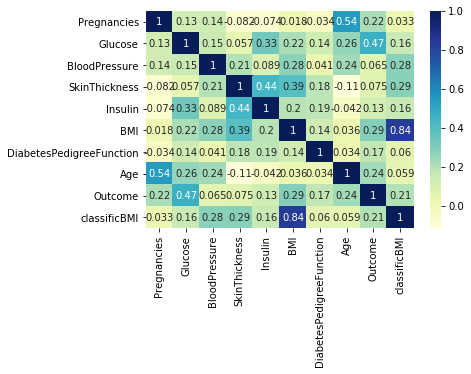

In [12]:
sns.heatmap(df_file_diabets.corr(), annot=True, cmap="YlGnBu")

In [13]:
# Quantidade total de resultados positivos
df_file_diabets.query("Outcome == 1").any(axis=1).count()

268

In [14]:
# Quantidade total de resultados positivos
df_file_diabets.query("Outcome == 0").any(axis=1).count()

500

# Verificando a quantidade de valores inconsistentes em cada atributo

In [15]:
print("A quantidade de zeros em Glucose é: {0}".format(df_file_diabets.query("Glucose == 0")["Glucose"].agg(['count']).values))
print("A quantidade de zeros em BloodPressure é: {0}".format(df_file_diabets.query("BloodPressure == 0")["BloodPressure"].agg(['count']).values))
print("A quantidade de zeros em SkinThickness é: {0}".format(df_file_diabets.query("SkinThickness == 0")["SkinThickness"].agg(['count']).values))
print("A quantidade de zeros em Insulin é: {0}".format(df_file_diabets.query("Insulin == 0")["Insulin"].agg(['count']).values))
print("A quantidade de zeros em BMI é: {0}".format(df_file_diabets.query("BMI == 0")["BMI"].agg(['count']).values))
print("A quantidade de zeros em DiabetesPedigreeFunction é: {0}".format(df_file_diabets.query("DiabetesPedigreeFunction == 0")["DiabetesPedigreeFunction"].agg(['count']).values))
print("A quantidade de zeros em Age é: {0}".format(df_file_diabets.query("Age == 0")["Age"].agg(['count']).values))
print("A quantidade de -10 em classificBMI é: {0}".format(df_file_diabets.query("classificBMI == -10")["classificBMI"].agg(['count']).values))

A quantidade de zeros em Glucose é: [5]
A quantidade de zeros em BloodPressure é: [35]
A quantidade de zeros em SkinThickness é: [227]
A quantidade de zeros em Insulin é: [374]
A quantidade de zeros em BMI é: [11]
A quantidade de zeros em DiabetesPedigreeFunction é: [0]
A quantidade de zeros em Age é: [0]
A quantidade de -10 em classificBMI é: [13]


# Verificando a porcentagem de valores inconsistentes em cada atributo

In [16]:
teste = df_file_diabets
teste["DiabetesPedigreeFunction"] = teste["DiabetesPedigreeFunction"].astype(float)

In [17]:
print("A porcentagem de zeros em DiabetesPedigreeFunction é de: {0}".format((teste["DiabetesPedigreeFunction"].value_counts(normalize=True).get(0))))

A porcentagem de zeros em DiabetesPedigreeFunction é de: None


In [18]:
print("A porcentagem de zeros em Glucose é de: {:3.4f}".format((df_file_diabets["Glucose"].value_counts(normalize=True).get(0))))
print("A porcentagem de zeros em BloodPressure é de: {:3.4f}".format((df_file_diabets["BloodPressure"].value_counts(normalize=True).get(0))))
print("A porcentagem de zeros em SkinThickness é de: {:3.4f}".format((df_file_diabets["SkinThickness"].value_counts(normalize=True).get(0))))
print("A porcentagem de zeros em Insulin é de: {:3.4f}".format((df_file_diabets["Insulin"].value_counts(normalize=True).get(0))))
print("A porcentagem de zeros em BMI é de: {:3.4f}".format((df_file_diabets["BMI"].value_counts(normalize=True).get(0))))
print("A porcentagem de zeros em DiabetesPedigreeFunction é de: {0}".format((df_file_diabets["DiabetesPedigreeFunction"].value_counts(normalize=True).get(0))))
print("A porcentagem de zeros em Age é de: {0}".format((df_file_diabets["Age"].value_counts(normalize=True).get(0))))
print("A porcentagem de valores -10 em classificBMI é de: {:3.4f}".format((df_file_diabets["classificBMI"].value_counts(normalize=True).get(0))))

A porcentagem de zeros em Glucose é de: 0.0065
A porcentagem de zeros em BloodPressure é de: 0.0456
A porcentagem de zeros em SkinThickness é de: 0.2956
A porcentagem de zeros em Insulin é de: 0.4870
A porcentagem de zeros em BMI é de: 0.0143
A porcentagem de zeros em DiabetesPedigreeFunction é de: None
A porcentagem de zeros em Age é de: None
A porcentagem de valores -10 em classificBMI é de: 0.0052


# Vou substituir os valores inconsistentes pela média - explico melhor na metodologia (la em cima)

### Após tratar os dados inconsistentes de Glucose a correlação deste valor com o da insulina aumentou

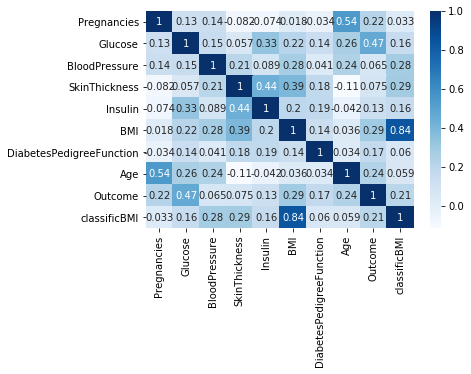

In [19]:
# antes da limpeza dos dados inconcistente de Insulin
sns.heatmap(df_file_diabets.corr(), annot=True, cmap="Blues")

In [20]:
#Glucose
not_healthy_Glucose_index = df_file_diabets.query("Outcome == 1 and Glucose == 0").index
df_file_diabets.iloc[not_healthy_Glucose_index, 1] = df_file_diabets.query("Outcome == 1 and Glucose > 0")["Glucose"].agg(["mean"]).get(0)

healthy_Glucose_index = df_file_diabets.query("Outcome == 0 and Glucose == 0").index
df_file_diabets.iloc[healthy_Glucose_index, 1] = df_file_diabets.query("Outcome == 0 and Glucose > 0")["Glucose"].agg(["mean"]).get(0)

#BloodPressure
not_healthy_BloodPressure_index = df_file_diabets.query("Outcome == 1 and BloodPressure == 0").index
df_file_diabets.iloc[not_healthy_BloodPressure_index, 2] = df_file_diabets.query("Outcome == 1 and Glucose > 0")["Glucose"].agg(["mean"]).get(0)

healthy_Glucose_index = df_file_diabets.query("Outcome == 0 and Glucose == 0").index
df_file_diabets.iloc[healthy_Glucose_index, 2] = df_file_diabets.query("Outcome == 0 and Glucose > 0")["Glucose"].agg(["mean"]).get(0)

#SkinThickness
not_healthy_SkinThickness_index = df_file_diabets.query("Outcome == 1 and SkinThickness == 0").index
df_file_diabets.iloc[not_healthy_SkinThickness_index, 3] = df_file_diabets.query("Outcome == 1 and SkinThickness > 0")["SkinThickness"].agg(["mean"]).get(0)

healthy_SkinThickness_index = df_file_diabets.query("Outcome == 0 and SkinThickness == 0").index
df_file_diabets.iloc[healthy_SkinThickness_index, 3] = df_file_diabets.query("Outcome == 0 and SkinThickness > 0")["SkinThickness"].agg(["mean"]).get(0)

#Insulin
not_healthy_insulin_index = df_file_diabets.query("Outcome == 1 and Insulin == 0").index
df_file_diabets.iloc[not_healthy_insulin_index, 4] = df_file_diabets.query("Outcome == 1 and Insulin > 0")["Insulin"].agg(["mean"]).get(0)

healthy_insulin_index = df_file_diabets.query("Outcome == 0 and Insulin == 0").index
df_file_diabets.iloc[healthy_insulin_index, 4] = df_file_diabets.query("Outcome == 0 and Insulin > 0")["Insulin"].agg(["mean"]).get(0)

#BMI
not_healthy_BMI_index = df_file_diabets.query("Outcome == 1 and BMI == 0").index
df_file_diabets.iloc[not_healthy_BMI_index, 5] = df_file_diabets.query("Outcome == 1 and BMI > 0")["BMI"].agg(["mean"]).get(0)

healthy_BMI_index = df_file_diabets.query("Outcome == 0 and BMI == 0").index
df_file_diabets.iloc[healthy_BMI_index, 5] = df_file_diabets.query("Outcome == 0 and BMI > 0")["BMI"].agg(["mean"]).get(0)

#classificBMI
not_healthy_classificBMI_index = df_file_diabets.query("Outcome == 1 and classificBMI == 0").index
df_file_diabets.iloc[not_healthy_classificBMI_index, 9] = df_file_diabets.query("Outcome == 1 and classificBMI > 0")["classificBMI"].agg(["mean"]).get(0)

healthy_classificBMI_index = df_file_diabets.query("Outcome == 0 and classificBMI == 0").index
df_file_diabets.iloc[healthy_classificBMI_index, 9] = df_file_diabets.query("Outcome == 0 and classificBMI > 0")["classificBMI"].agg(["mean"]).get(0)


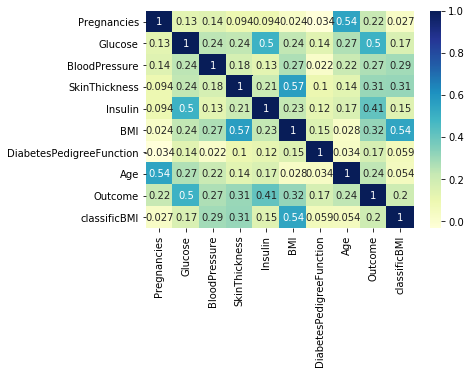

In [21]:
# Após a limpeza
sns.heatmap(df_file_diabets.corr(), annot=True, cmap="YlGnBu")

In [22]:
tree_decision(df_file_diabets)

Matrix de confusão
[[128  12]
 [ 17  74]]


              precision    recall  f1-score   support

           0       0.88      0.91      0.90       140
           1       0.86      0.81      0.84        91

   micro avg       0.87      0.87      0.87       231
   macro avg       0.87      0.86      0.87       231
weighted avg       0.87      0.87      0.87       231



Sorted


mean test_score = 0.2751


mean train_score = 0.2928


mean score_time = 0.0016


mean fit_time = 0.0041


/home/alison/.pyenv/versions/anaconda3-2019.03/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [23]:
df_file_diabets.drop(["BMI","Pregnancies"], axis=1, inplace=True)

In [24]:
tree_decision(df_file_diabets)

Matrix de confusão
[[123  16]
 [ 21  71]]


              precision    recall  f1-score   support

           0       0.85      0.88      0.87       139
           1       0.82      0.77      0.79        92

   micro avg       0.84      0.84      0.84       231
   macro avg       0.84      0.83      0.83       231
weighted avg       0.84      0.84      0.84       231



Sorted


mean test_score = 0.2751


mean train_score = 0.2928


mean score_time = 0.0019


mean fit_time = 0.0044


/home/alison/.pyenv/versions/anaconda3-2019.03/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
